# Use Random Forest to prepare a model on froud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import plot_tree#for visualizing tree 
import warnings
warnings.filterwarnings("ignore")


In [11]:
df=pd.read_csv("D:/Fraud_check _Random.csv")

In [12]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [13]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [15]:
##Converting the Taxable income variable to bucketing. 
df["income"]=df["Taxable.Income"]
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risk"


In [16]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

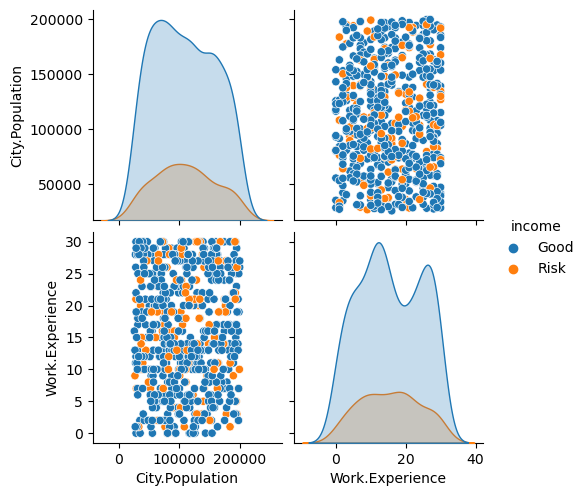

In [39]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'income')

In [40]:
df["income"].value_counts()

Good    476
Risk    124
Name: income, dtype: int64

# Data Transformation of Continuous Variable.....

In [41]:
X=[var for var in df.columns if df[var].dtypes!="object"]

In [42]:
df2=df[X]

In [43]:
df2

,City.Population,Work.Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [44]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
df3=SS.fit_transform(df2)
df3=pd.DataFrame(df3)
df3.columns=["City.Population","Work.Experience"]
df3

,City.Population,Work.Experience
0,-1.178521,-0.629143
1,0.508500,0.276370
2,1.033109,1.634639
3,1.696831,-0.063197
4,-1.630532,1.408261
...,...,...
595,-1.390432,-0.968710
596,-1.071672,-1.534655
597,0.909696,-1.761033
598,1.432197,0.163181


In [45]:
categorical=[var for var in df.columns if df[var].dtypes=="object"]

In [46]:
df4=df[categorical]

In [47]:
df4

,Undergrad,Marital.Status,Urban,income
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good
...,...,...,...,...
595,YES,Divorced,YES,Good
596,YES,Divorced,YES,Good
597,NO,Divorced,YES,Good
598,YES,Married,NO,Good


In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [49]:
for i in range(0,4):
    df4.iloc[:,i]=LE.fit_transform(df4.iloc[:,i])

In [50]:
df4

,Undergrad,Marital.Status,Urban,income
0,0,2,1,0
1,1,0,1,0
2,0,1,1,0
3,1,2,1,0
4,0,1,0,0
...,...,...,...,...
595,1,0,1,0
596,1,0,1,0
597,0,0,1,0
598,1,1,0,0


In [51]:
df5=pd.concat([df3,df4],axis=1)

In [52]:
df5

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,income
0,-1.178521,-0.629143,0,2,1,0
1,0.508500,0.276370,1,0,1,0
2,1.033109,1.634639,0,1,1,0
3,1.696831,-0.063197,1,2,1,0
4,-1.630532,1.408261,0,1,0,0
...,...,...,...,...,...,...
595,-1.390432,-0.968710,1,0,1,0
596,-1.071672,-1.534655,1,0,1,0
597,0.909696,-1.761033,0,0,1,0
598,1.432197,0.163181,1,1,0,0


In [53]:
Y=df5["income"]
X=df5.iloc[:,0:5]

In [62]:
Y.value_counts()

0    476
1    124
Name: income, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=44)

In [130]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(max_samples=0.6,n_estimators=50,max_features=0.5,random_state=44,max_depth=3)

In [131]:
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, max_features=0.5, max_samples=0.6,
                       n_estimators=50, random_state=44)

In [132]:
from sklearn.metrics import accuracy_score as ac
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [133]:
print("Trainning accuracy",ac(Y_train,Y_pred_train).round(2))
print("Test accuracy",ac(Y_test,Y_pred_test).round(2))

Trainning accuracy 0.81
Test accuracy 0.76
